<a href="https://colab.research.google.com/github/loicpages/qmII_group_rep/blob/main/Southern_Africa_Production_and_Import_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#importing libraries 
import pylab
import pandas as pd
import numpy as np
from google.colab import files
import io
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline
plt.style.use('ggplot')

In [12]:
#importing data with pandas 
data_path = '/content/df_final(regions,withmissingvalues).csv'
general_df = pd.read_csv(data_path, encoding ='latin-1', sep=',')
general_df
general_df.fillna(0, inplace=True)

In [13]:
#scatter plots 
def plot_country(country, feature1, feature2, plot=True, show=True):
  country_feature1= general_df[general_df['Country']==country][feature1]
  df_feature1=pd.DataFrame(country_feature1)  

  country_feature2= general_df[general_df['Country']==country][feature2]
  df_feature2 =pd.DataFrame(country_feature2) 

  merged = df_feature1.merge(df_feature2, left_index=True, right_index=True)

  if plot:
    merged.plot(x=feature1, y=feature2, kind = 'scatter')
    plt.title(country)
  
  #linear regression line 
  x=merged[feature1]
  y=merged[feature2]
  x= x.to_numpy()
  y= y.to_numpy()
  m, b = np.polyfit(x, y, 1)
  if plot:
    plt.plot(x, m*x+b, c='red')
  if show:
    print(country)
    print(m)
    print(b)
  
  #Calculating the R square value for each country 
  temp= np.corrcoef(x,y)
  temp[0,1]**2
  rS2=temp[0,1]**2
  if show:
    print(rS2)

  corr = merged.corr()
  return corr


Zimbabwe
-1.589121828132179
246.76191874002402
0.393757026638197
Zambia
-1.0931393773814755
211.96982072837383
0.22745692639629894
Swaziland
-0.605557099400497
174.67727696081292
0.11885108645611116
Namibia
-0.1319900302032851
115.53271772022688
0.020822142776690738
Mozambique
0.17691098693902635
174.854419424384
0.0023544749588684066
Malawi
-2.4385673008408344
271.03643331312225
0.2298821344201817
Madagascar
0.585287513089019
200.81024795753024
0.03320737631374269
Lesotho
-0.17928187818896965
110.08127353749333
0.020864925655301753


,Imports (all) per capita (kg/cap/year),Production Quantity per capita (kg/cap/year)
Imports (all) per capita (kg/cap/year),1.000000,-0.144447
Production Quantity per capita (kg/cap/year),-0.144447,1.000000


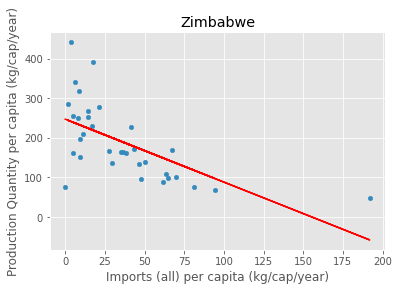

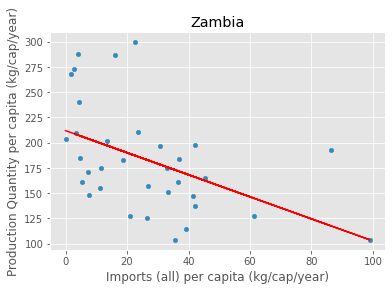

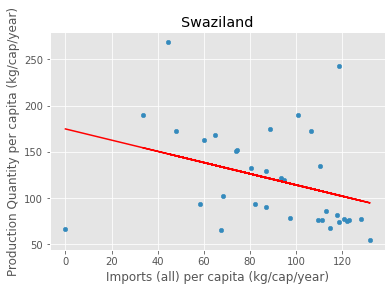

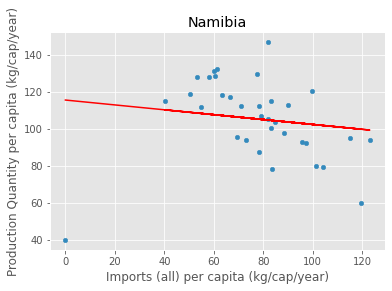

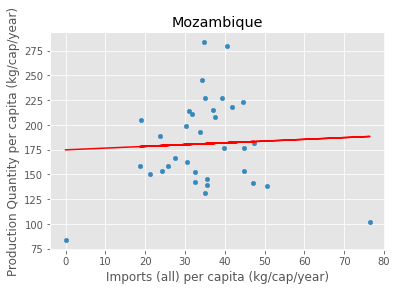

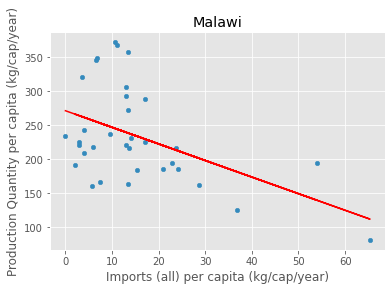

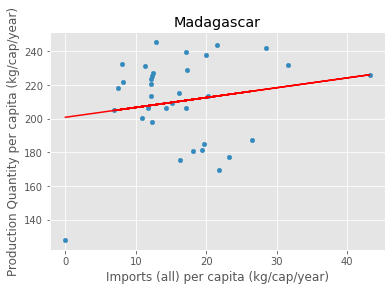

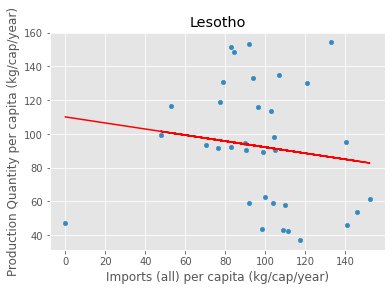

In [14]:
#calling the function for every country in Southern Africa - food production and import quantity
plot_country('Zimbabwe','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Zambia','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Swaziland','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Namibia','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Mozambique','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Malawi','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Madagascar','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Lesotho','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')

In [15]:
#corelation coefficient - production and import 
countries = ['Zimbabwe', 'Zambia','Swaziland', 'Namibia', 'Mozambique','Malawi', 'Madagascar', 'Lesotho']

feature1= 'Production Quantity per capita (kg/cap/year)'
feature2= 'Import Quantity (Grains & Ce.)(1000MT)'

list_of_correlations = []

for country in countries : 
  corr = plot_country(country, feature1, feature2, False, False)
  list_of_correlations.append((country,corr))

for corr in list_of_correlations : 
  print(corr[0], corr[1])

Zimbabwe                                               Production Quantity per capita (kg/cap/year)  Import Quantity (Grains & Ce.)(1000MT)
Production Quantity per capita (kg/cap/year)                                      1.000000                               -0.729512
Import Quantity (Grains & Ce.)(1000MT)                                           -0.729512                                1.000000
Zambia                                               Production Quantity per capita (kg/cap/year)  Import Quantity (Grains & Ce.)(1000MT)
Production Quantity per capita (kg/cap/year)                                      1.000000                               -0.597647
Import Quantity (Grains & Ce.)(1000MT)                                           -0.597647                                1.000000
Swaziland                                               Production Quantity per capita (kg/cap/year)  Import Quantity (Grains & Ce.)(1000MT)
Production Quantity per capita (kg/cap/year)             